### 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [2]:
# 한글 폰트 사용을 위해서 세팅
# 출처: https://bskyvision.com/1133
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [32]:
# 다섯 가지 주요 카테고리 CSV 파일 열기
df = pd.read_csv('preprocessed_5.csv', encoding='UTF8')

In [4]:
df.columns

Index(['JOIN_SN', 'JOIN_SN_TYP', 'BTH_YR', 'GENDER', 'IS_KRN', 'AGE',
       'SCTR_CD', 'COM_SN', 'POL_SN', 'GIS_CD', 'INS_GBN_CD', 'INS_CT_STAT_CD',
       'CT_ST_DT', 'CT_END_DT', 'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD',
       'CT_CHNL_CD', 'INSU_DAYS', 'INSU_YEAR', 'MGG_GRP_CD', 'MGG_CD',
       'MGG_CNT', 'MGG_AMT_SUM', 'PRODUCT', 'COMPANY'],
      dtype='object')

In [33]:
# 보험종류코드 중 질병(건강)보험만 추출
df = df[df['INS_GBN_CD'] == 3]
df

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,INS_GBN_CD,INS_CT_STAT_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,PRODUCT,COMPANY
0,233370,1,1997,2,1,26,8,6900284,344059,33,3,2,2018-06-01,2096-06-01,70,2,20,1,28490,79,A5,A5309,1,4500,NaN,NaN
1,233370,1,1997,2,1,26,8,6900284,344059,33,3,2,2018-06-01,2096-06-01,70,2,20,1,28490,79,A4,A4102,1,18000,NaN,NaN
2,233370,1,1997,2,1,26,8,6900284,344059,33,3,2,2018-06-01,2096-06-01,70,2,20,1,28490,79,A5,A5107,1,1800,NaN,NaN
3,233370,1,1997,2,1,26,8,6900284,344059,33,3,2,2018-06-01,2096-06-01,70,2,20,1,28490,79,A6,A6109,1,100,NaN,NaN
4,233370,1,1997,2,1,26,8,6900284,344059,33,3,2,2018-06-01,2096-06-01,70,2,20,1,28490,79,A4,A4200,1,18000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407414,661678,1,1981,2,1,42,8,4428114,2728694,11,3,2,2019-04-01,2039-04-01,1200,2,20,6,7305,21,A4,A4103,2,25000,NaN,NaN
407415,661678,1,1981,2,1,42,8,4428114,2728694,11,3,2,2019-04-01,2039-04-01,1200,2,20,6,7305,21,A4,A4200,2,15000,NaN,NaN
407416,661678,1,1981,2,1,42,8,4428114,2728694,11,3,2,2019-04-01,2039-04-01,1200,2,20,6,7305,21,A4,A4199,2,25000,NaN,NaN
407417,661678,1,1981,2,1,42,8,4428114,2728694,11,3,2,2019-04-01,2039-04-01,1200,2,20,6,7305,21,A4,A4104,2,25000,NaN,NaN


In [34]:
codes = pd.read_csv('코드표.csv', encoding='UTF8', sep=',')
codes['CD_NM'] = codes['CD_NM'].str.strip()
codes

,CD_NM,CD_DESC
0,A1000,일반사망
1,A1100,질병사망
2,A1101,유병자질병사망
3,A1199,특정질병사망
4,A1200,암사망
...,...,...
311,A91,소득보상금(정액)
312,A94,위로금(정액)
313,A95,치과치료(정액)
314,A96,기타(정액)


In [35]:
codes = codes.set_index('CD_NM')

In [36]:
code_dict = codes.to_dict()['CD_DESC']
code_dict

{'A1000': '일반사망',
 'A1100': '질병사망',
 'A1101': '유병자질병사망',
 'A1199': '특정질병사망',
 'A1200': '암사망',
 'A1299': '특정암사망',
 'A1300': '상해사망',
 'A1301': '유병자상해사망',
 'A1399': '특정상해사망',
 'A1400': '교통상해사망',
 'A1401': '휴일교통상해사망',
 'A1402': '평일교통상해사망',
 'A1403': '대중교통상해사망',
 'A1404': '휴일대중교통상해사망',
 'A1405': '평일대중교통상해사망',
 'A1499': '특정교통상해사망',
 'A1999': '기타사망',
 'A2000': '사망후유장해',
 'A2100': '질병사망후유장해',
 'A2199': '특정질병사망후유장해',
 'A2200': '암사망후유장해',
 'A2299': '특정암사망후유장해',
 'A2300': '상해사망후유장해',
 'A2399': '특정상해사망후유장해',
 'A2400': '교통상해사망후유장해',
 'A2401': '휴일교통상해사망후유장해',
 'A2402': '평일교통상해사망후유장해',
 'A2403': '대중교통상해사망후유장해',
 'A2404': '휴일대중교통상해사망후유장해',
 'A2405': '평일대중교통상해사망후유장해',
 'A2499': '특정교통상해사망후유장해',
 'A2500': '사망고도후유장해',
 'A2600': '질병사망고도후유장해',
 'A2699': '특정질병사망고도후유장해',
 'A2700': '암사망고도후유장해',
 'A2799': '특정암사망고도후유장해',
 'A2800': '상해사망고도후유장해',
 'A2899': '특정상해사망고도후유장해',
 'A2900': '교통상해사망고도후유장해',
 'A2901': '휴일교통상해사망고도후유장해',
 'A2902': '평일교통상해사망고도후유장해',
 'A2903': '대중교통상해사망고도후유장해',
 'A2904': '휴일대중교통상해사망고도후유장해',
 'A2

In [37]:
df = df.replace(code_dict)

### 보험담보코드, 보험담보그룹코드 구성 파악

In [10]:
# 보험담보그룹코드 (MGG_GRP_CD) 구성 파악
mortgage_groups = df['MGG_GRP_CD'].unique()
mortgage_groups

array(['수술(정액)', '진단(정액)', '입원(정액)', '기타(정액)', '사망(정액)', '후유장해(정액)',
       '위로금(정액)', '통원(정액)', '치과치료(정액)', '간병(정액)', '한방치료(정액)'],
      dtype=object)

In [11]:
# 보험담보코드 (MGG_CD) 구성 파악
df.groupby('MGG_GRP_CD')['MGG_CD'].unique()

MGG_GRP_CD
간병(정액)                                                   [간병]
기타(정액)      [항암방사선약물치료비, 깁스치료, 응급치료, 기타 인보험(정액)담보, 자동차보험료할...
사망(정액)      [상해사망, 질병사망, 유병자상해사망, 대중교통상해사망, 교통상해사망, 암사망, 유...
수술(정액)      [상해종수술, 허혈성심장질환수술, 뇌혈관질환수술, 질병수술, 상해수술, 특정질병수술...
위로금(정액)                 [자동차사고부상위로금, 기타위로금, 면허취소위로금, 유괴납치위로금]
입원(정액)      [허혈성심장질환입원일당, 뇌혈관질환입원일당, 질병입원일당, 상해입원일당, 암입원일당...
진단(정액)      [뇌출혈진단, 암진단, 급성심근경색진단, 뇌졸중진단, 소액암진단, 특정질병진단, 화...
치과치료(정액)                     [기타치과담보, 치과치료(보철치료), 치과치료(보존치료)]
통원(정액)          [기타통원, 암통원, 질병통원, 상해통원, 특정상해통원, 특정질병통원, 치과통원]
한방치료(정액)                              [질병한방치료, 암한방치료, 상해한방치료]
후유장해(정액)    [질병80%이상후유장해, 상해후유장해, 상해50%이상후유장해, 상해80%이상후유장해...
Name: MGG_CD, dtype: object

In [12]:
# 보험담보코드 (MGG_CD) 구성 파악
mortgage_cnt = df.groupby('MGG_GRP_CD')['MGG_CD'].value_counts()
mortgage_cnt

MGG_GRP_CD  MGG_CD       
간병(정액)      간병                187
기타(정액)      항암방사선약물치료비       1634
            깁스치료             1409
            기타 인보험(정액)담보     1195
            응급치료              345
                             ... 
후유장해(정액)    교통상해80%이상후유장해      55
            교통상해후유장해           44
            교통상해50%이상후유장해      16
            특정교통상해후유장해          1
            휴일교통상해후유장해          1
Name: MGG_CD, Length: 116, dtype: int64

In [13]:
# 가장 많은 보험 담보들 top 3 
for group in mortgage_groups:
    top_3_cnt = mortgage_cnt.loc[group].iloc[0:3]
    top_3_cnt.name = group
    print(top_3_cnt)

MGG_CD
기타수술    2810
암수술     2382
질병수술    2364
Name: 수술(정액), dtype: int64
MGG_CD
급성심근경색진단    5507
암진단         5306
뇌출혈진단       3586
Name: 진단(정액), dtype: int64
MGG_CD
상해입원일당    3752
질병입원일당    3553
암입원일당     2878
Name: 입원(정액), dtype: int64
MGG_CD
항암방사선약물치료비      1634
깁스치료            1409
기타 인보험(정액)담보    1195
Name: 기타(정액), dtype: int64
MGG_CD
상해사망       4396
질병사망       2292
유병자상해사망     631
Name: 사망(정액), dtype: int64
MGG_CD
상해80%이상후유장해    2979
상해후유장해         2947
질병80%이상후유장해    2495
Name: 후유장해(정액), dtype: int64
MGG_CD
자동차사고부상위로금    975
면허취소위로금       235
기타위로금          80
Name: 위로금(정액), dtype: int64
MGG_CD
암통원       157
기타통원      114
특정질병통원     52
Name: 통원(정액), dtype: int64
MGG_CD
치과치료(보존치료)    247
치과치료(보철치료)    224
기타치과담보        157
Name: 치과치료(정액), dtype: int64
MGG_CD
간병    187
Name: 간병(정액), dtype: int64
MGG_CD
질병한방치료    9
암한방치료     5
상해한방치료    4
Name: 한방치료(정액), dtype: int64


- A4104 급성심근경색진단 (10987), A4200 암진단 (10733), A4103 뇌졸중진단 (7083)
- A1300 상해사망 (9779), A1100 질병사망 (7581)
- A5199 특정질병수술 (7845), 
- A6300 상해입원일당 (7127)

### 보험 기간 비율 파악

#### 준비

In [17]:
# 기간들을 datetime 형태로 변환
df['CT_END_DT'] = pd.to_datetime(df['CT_END_DT'], format='%Y%m', errors='coerce')
df['CT_ST_DT'] = pd.to_datetime(df['CT_ST_DT'], format='%Y%m', errors='coerce')
df.sample(10)[['CT_ST_DT', 'CT_END_DT']]

,CT_ST_DT,CT_END_DT
121451,NaT,NaT
348515,NaT,NaT
276646,NaT,NaT
381781,NaT,NaT
394251,NaT,NaT
242641,NaT,NaT
76559,NaT,NaT
407191,NaT,NaT
50676,NaT,NaT
41612,NaT,NaT


In [15]:
# 보장 기간(CT_PD) 컬럼 생성
# 1일을 더해서 10년 단위
df['CT_PD'] = (df['CT_END_DT'] - df['CT_ST_DT'] + pd.Timedelta('1 days'))
# timedelta64[Y]으로 하면 연 단위로 바뀜
df['CT_PD'] = df['CT_PD'].astype('timedelta64[Y]')
df.sample(10)[['CT_ST_DT', 'CT_END_DT', 'CT_PD']]

,CT_ST_DT,CT_END_DT,CT_PD
302500,NaT,NaT,NaN
248736,NaT,NaT,NaN
363425,NaT,NaT,NaN
167337,NaT,NaT,NaN
294010,NaT,NaT,NaN
392277,NaT,NaT,NaN
245752,NaT,NaT,NaN
200879,NaT,NaT,NaN
74746,NaT,NaT,NaN
268347,NaT,NaT,NaN


#### 기간 분석
Top 3
- (1) 종기월이 없는 (종신보험?) 보험: 10만여 개
- (2) 20년 기한인 보험이 1만 7천여 개
- (3) 10년 기한인 보험이 1만 1천여 개

In [96]:
df_group = df.groupby("CT_PD").count()
df_group

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,AGE_CTG
CT_PD,,,,,,,,,,,,,,,,,,,,,
1.0,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
3.0,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
4.0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
5.0,972,972,972,972,972,972,972,972,972,972,...,972,972,972,972,972,972,972,972,972,972
7.0,284,284,284,284,284,284,284,284,284,284,...,284,284,284,284,284,284,284,284,284,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86.0,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
87.0,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
88.0,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65


In [98]:
# 20년 기한인 보험이 11000여 개,
# 10년 기한인 보험이 17000여 개
df_group.sort_values(by='JOIN_SN', ascending=False)

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,AGE_CTG
CT_PD,,,,,,,,,,,,,,,,,,,,,
10.0,17750,17750,17750,17750,17750,17750,17750,17750,17750,17750,...,17750,17750,17750,17750,17750,17750,17750,17750,17750,17750
20.0,11424,11424,11424,11424,11424,11424,11424,11424,11424,11424,...,11424,11424,11424,11424,11424,11424,11424,11424,11424,11424
15.0,2631,2631,2631,2631,2631,2631,2631,2631,2631,2631,...,2631,2631,2631,2631,2631,2631,2631,2631,2631,2631
72.0,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826,...,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
50.0,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810,...,1810,1810,1810,1810,1810,1810,1810,1810,1810,1810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89.0,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
13.0,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
3.0,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [42]:
# 보험종기월이 없는 건 10만여 개
df[df['CT_PD'].isna()]

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,CT_PD
161,736649,1,1966,2,1,57,8,3347454,9290459,31,...,NaT,140,2,29,1,A1,A1100,1,27000,NaN
162,736649,1,1966,2,1,57,8,3347454,9290459,31,...,NaT,140,2,29,1,A4,A4102,1,9000,NaN
163,736649,1,1966,2,1,57,8,3347454,9290459,31,...,NaT,140,2,29,1,A4,A4109,1,14000,NaN
164,736649,1,1966,2,1,57,8,3347454,9290459,31,...,NaT,140,2,29,1,A4,A4200,2,23000,NaN
165,736649,1,1966,2,1,57,8,3347454,9290459,31,...,NaT,140,2,29,1,A7,A7199,2,100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543438,213852,1,1987,1,1,36,8,9896551,5997838,26,...,NaT,83,2,20,1,A1,A1401,1,55000,NaN
543439,213852,1,1987,1,1,36,8,9896551,5997838,26,...,NaT,83,2,20,1,A4,A4103,1,44000,NaN
543440,213852,1,1987,1,1,36,8,9896551,5997838,26,...,NaT,83,2,20,1,A1,A1100,1,55000,NaN
543441,213852,1,1987,1,1,36,8,9896551,5997838,26,...,NaT,83,2,20,1,A1,A1400,1,55000,NaN


### 납입주기코드 비율 파악: 월납 가장 많음

In [7]:
# 납입 주기 (CT_PY_CYCLE_CD) 구성 파악
# -> 대부분 월납
df.groupby('CT_PY_CYCLE_CD').count()

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,INS_CT_STAT_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM
CT_PY_CYCLE_CD,,,,,,,,,,,,,,,,,,,,,
1,275,275,275,275,275,275,275,275,275,275,...,275,275,275,275,275,275,275,275,275,275
2,200370,200370,200370,200370,200370,200370,200370,200370,200370,200370,...,200370,200370,200370,200370,200370,200370,200370,200370,200370,200370
3,137,137,137,137,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137
99,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


### 납입 기간: 20이 가장 많음 (연도? 횟수?)

In [89]:
# 월 납입인 보험들만 골라,
# 납입 기간으로 묶은 다음,
# 많은 순서대로 정렬
df[df['CT_PY_CYCLE_CD'] == 2]\
.groupby("CT_PY_PD")\
.count()\
.sort_values(by='JOIN_SN', ascending=False)

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,INS_GBN_CD,INS_CT_STAT_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM
CT_PY_PD,,,,,,,,,,,,,,,,,,,,,
20,123226,123226,123226,123226,123226,123226,123226,123226,123226,123226,123226,123226,123226,123226,123226,123226,123226,123226,123226,123226,123226
10,23024,23024,23024,23024,23024,23024,23024,23024,23024,23024,23024,23024,23024,23024,23024,23024,23024,23024,23024,23024,23024
30,14556,14556,14556,14556,14556,14556,14556,14556,14556,14556,14556,14556,14556,14556,14556,14556,14556,14556,14556,14556,14556
15,11533,11533,11533,11533,11533,11533,11533,11533,11533,11533,11533,11533,11533,11533,11533,11533,11533,11533,11533,11533,11533
25,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
72,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


### 납입보험료: 100이랑 40이 가장 많음 

In [93]:

amount_count = df[df['CT_PD'] == 20].groupby('CT_PY_AMT').count()
amount_count.sort_values(by='JOIN_SN', ascending=False).head(10)

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,INS_GBN_CD,INS_CT_STAT_CD,CT_ST_DT,CT_END_DT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,CT_PD
CT_PY_AMT,,,,,,,,,,,,,,,,,,,,,,
110,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527
120,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310
130,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261,261
60,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259
41,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234
46,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234
100,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229
45,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208
56,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207


<AxesSubplot:xlabel='CT_PY_AMT'>

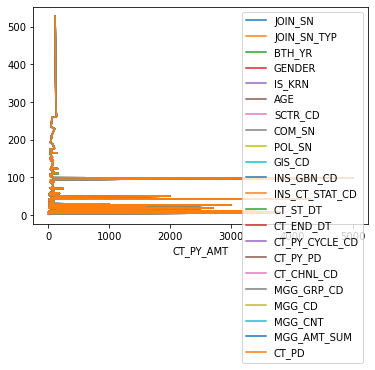

In [104]:
amount_count = df[df['CT_PD'] == 20].groupby('CT_PY_AMT').count()
amount_count.sort_values(by='JOIN_SN', ascending=False).plot()

### 데이터 준비 - 연령대 & 성별 추가

#### 연령대

In [39]:
bins = list(range(10, 91, 10))
labels = [str(age) + 's' for age in list(range(10, 81, 10))]
labels

['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s']

In [40]:
df['AGE_CTG'] = pd.cut(df['AGE'], bins, labels=labels)
df['AGE_CTG']

0         20s
1         20s
2         20s
3         20s
4         20s
         ... 
407414    40s
407415    40s
407416    40s
407417    40s
407418    40s
Name: AGE_CTG, Length: 100657, dtype: category
Categories (8, object): ['10s' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s']

In [41]:
df.groupby('AGE_CTG').count()

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,INS_GBN_CD,INS_CT_STAT_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,PRODUCT,COMPANY
AGE_CTG,,,,,,,,,,,,,,,,,,,,,,,,,,
10s,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,0,0
20s,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,0,0
30s,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,0,0
40s,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,0,0
50s,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,0,0
60s,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,0,0
70s,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,0,0
80s,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,0,0


<AxesSubplot:ylabel='JOIN_SN'>

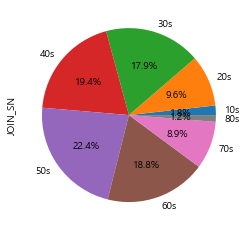

In [21]:
age_category_count = df.groupby('AGE_CTG').count()
age_category_count['JOIN_SN'].plot(kind='pie', autopct='%.1f%%')

['20s', '40s', '10s', '60s', '30s', '50s', '70s', '80s']
Categories (8, object): ['10s' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s']


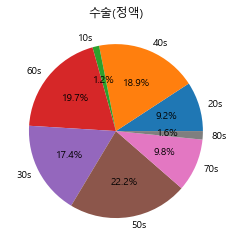

['20s', '40s', '10s', '60s', '70s', '30s', '50s', '80s']
Categories (8, object): ['10s' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s']


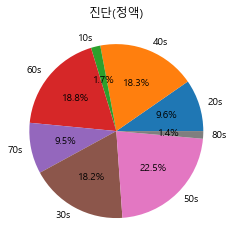

['20s', '40s', '10s', '70s', '60s', '30s', '50s', '80s']
Categories (8, object): ['10s' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s']


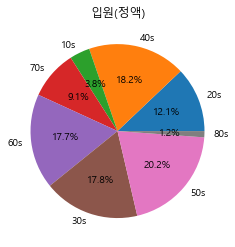

['20s', '60s', '30s', '40s', '50s', '70s', '80s', '10s']
Categories (8, object): ['10s' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s']


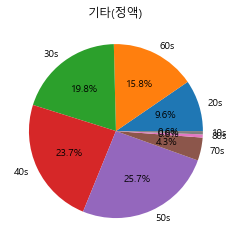

['40s', '60s', '30s', '50s', '70s', '20s', '80s', '10s']
Categories (8, object): ['10s' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s']


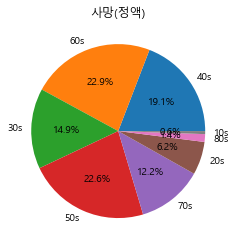

['40s', '60s', '30s', '50s', '70s', '20s', '80s', '10s']
Categories (8, object): ['10s' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s']


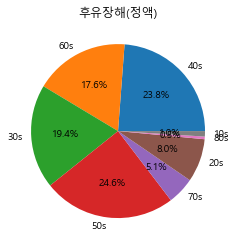

['40s', '50s', '70s', '30s', '20s', '60s', '80s', '10s']
Categories (8, object): ['10s' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s']


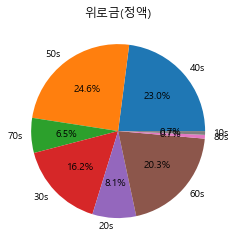

['40s', '50s', '60s', '20s', '70s', '10s', '30s', '80s']
Categories (8, object): ['10s' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s']


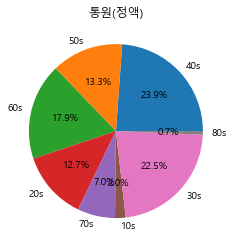

['50s', '40s', '30s', '60s', '20s', '10s', '70s', '80s']
Categories (8, object): ['10s' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s']


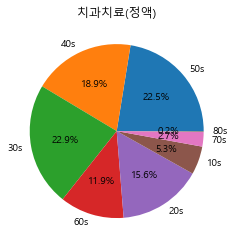

['50s', '30s', '40s', '10s', '60s', '70s', '20s', '80s']
Categories (8, object): ['10s' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s']


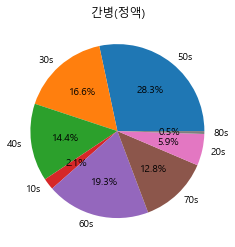

['20s', '50s', '30s', '60s', '40s']
Categories (5, object): ['20s' < '30s' < '40s' < '50s' < '60s']


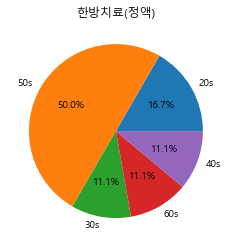

In [22]:
# 보험담보그룹 별 나이대 비율

for group in mortgage_groups:
    df_mgg = df[df["MGG_GRP_CD"] == group]

    age_cnt = df_mgg.groupby("AGE_CTG").count()
    
    age_arr = []
    labels = []
    print(df_mgg.AGE_CTG.unique())
#     print(age_cnt)
    for i in df_mgg.AGE_CTG.unique():
        if age_cnt["AGE"][i]:
            age_arr.append(age_cnt["AGE"][i])
            labels.append(i)
    plt.pie(age_arr, labels=labels, autopct='%.1f%%')
    plt.title(group)
    plt.show()

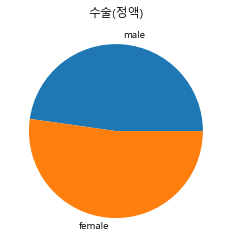

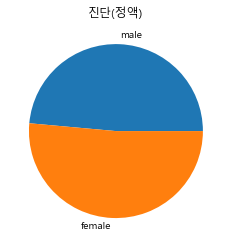

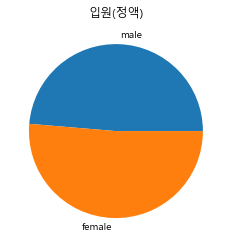

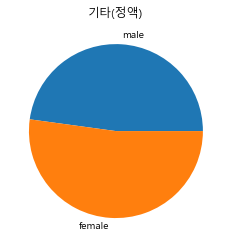

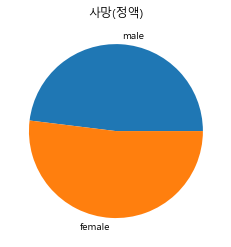

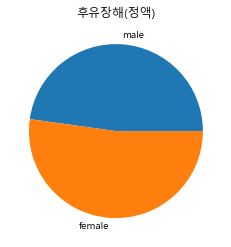

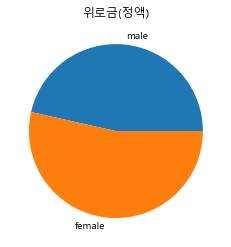

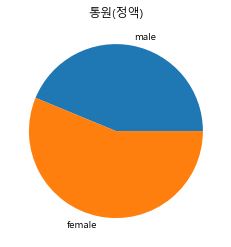

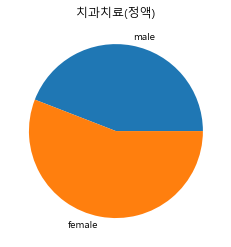

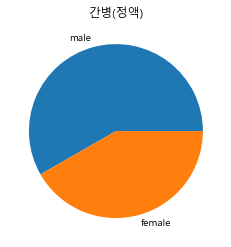

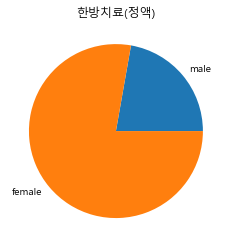

In [23]:
for group in mortgage_groups:
    df_mgg = df[df["MGG_GRP_CD"] == group]
    
    gender_cnt = df_mgg.groupby("GENDER").count()
    male = gender_cnt["JOIN_SN"][1]
    female = gender_cnt["JOIN_SN"][2]

    labels = ["male", "female"]

    plt.pie([male, female], labels=labels)
    plt.title(group)
    plt.show()

#### 성별

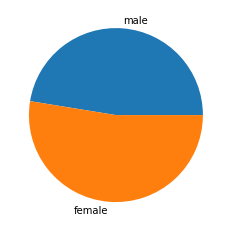

In [106]:
# 성별
gender_cnt = df.groupby("GENDER").count()
male = gender_cnt["JOIN_SN"][1]
female = gender_cnt["JOIN_SN"][2]

plt.pie([male, female], labels=["male", "female"])
plt.show()

In [42]:
df.groupby('AGE_CTG').count()

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,INS_GBN_CD,INS_CT_STAT_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,PRODUCT,COMPANY
AGE_CTG,,,,,,,,,,,,,,,,,,,,,,,,,,
10s,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,0,0
20s,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,9614,0,0
30s,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,18028,0,0
40s,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,19549,0,0
50s,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,22564,0,0
60s,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,18928,0,0
70s,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,8946,0,0
80s,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,0,0


['입원(정액)' '수술(정액)' '진단(정액)' '사망(정액)' '후유장해(정액)' '기타(정액)' '치과치료(정액)'
 '간병(정액)' '통원(정액)' '위로금(정액)']


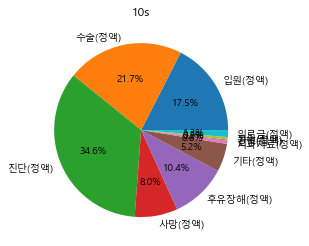

['수술(정액)' '진단(정액)' '입원(정액)' '기타(정액)' '후유장해(정액)' '사망(정액)' '위로금(정액)'
 '치과치료(정액)' '통원(정액)' '한방치료(정액)' '간병(정액)']


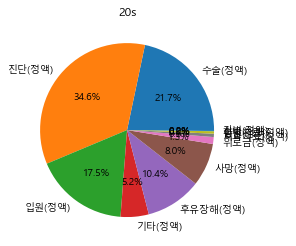

['수술(정액)' '진단(정액)' '입원(정액)' '후유장해(정액)' '사망(정액)' '기타(정액)' '위로금(정액)'
 '치과치료(정액)' '간병(정액)' '통원(정액)' '한방치료(정액)']


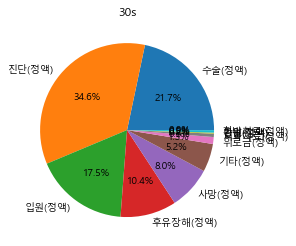

['수술(정액)' '진단(정액)' '사망(정액)' '입원(정액)' '후유장해(정액)' '기타(정액)' '위로금(정액)'
 '통원(정액)' '치과치료(정액)' '간병(정액)' '한방치료(정액)']


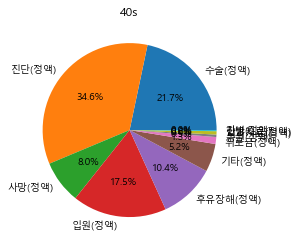

['진단(정액)' '입원(정액)' '수술(정액)' '사망(정액)' '후유장해(정액)' '치과치료(정액)' '기타(정액)'
 '위로금(정액)' '간병(정액)' '통원(정액)' '한방치료(정액)']


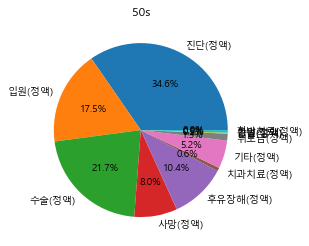

['진단(정액)' '후유장해(정액)' '사망(정액)' '수술(정액)' '기타(정액)' '입원(정액)' '통원(정액)'
 '치과치료(정액)' '위로금(정액)' '간병(정액)' '한방치료(정액)']


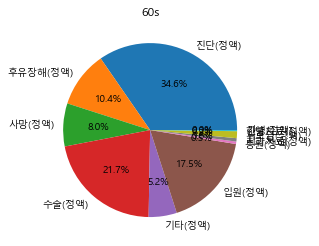

['진단(정액)' '입원(정액)' '수술(정액)' '사망(정액)' '위로금(정액)' '기타(정액)' '후유장해(정액)'
 '통원(정액)' '치과치료(정액)' '간병(정액)']


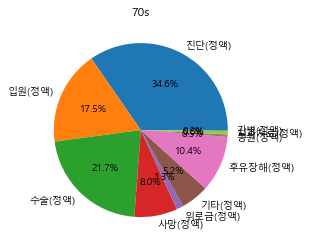

['진단(정액)' '수술(정액)' '사망(정액)' '입원(정액)' '기타(정액)' '후유장해(정액)' '위로금(정액)'
 '치과치료(정액)' '통원(정액)' '간병(정액)']


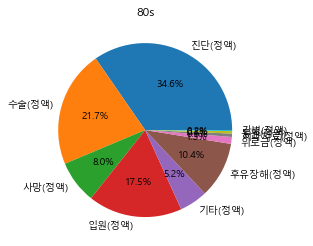

In [45]:
dfs_age = {}
for n in df.AGE_CTG.unique():
    dfs_age[n] = df[df["AGE_CTG"] == n]
    
for n in sorted(df.AGE_CTG.unique()):
    mgg_cnt = df.groupby("MGG_GRP_CD").count()
    mgg_arr = []
    labels = []
    print(dfs_age[n].MGG_GRP_CD.unique())
#     print(age_cnt)
    for i in dfs_age[n].MGG_GRP_CD.unique():
        if mgg_cnt["JOIN_SN"][i]:
            mgg_arr.append(mgg_cnt["JOIN_SN"][i])
            labels.append(i)
    plt.pie(mgg_arr, labels=labels, autopct='%.1f%%')
    plt.title(f"{n}")
    plt.show()